In [8]:
import os
import multiprocessing
import sys
import platform
import threading
import time
import random
import cv2
import matplotlib.pyplot as plt

In [9]:
active = threading.active_count()
print("Active Threads = ",active)

Active Threads =  6


In [10]:
core = multiprocessing.cpu_count()
print("Number of cores = ",core)

Number of cores =  8


In [11]:
print ("OS Platform: ", platform.platform())

OS Platform:  Windows-10-10.0.22621-SP0


In [12]:
dir1 = os.listdir(os.path.join('IMG'))
len(dir1)

30000

In [16]:
def task(path,directory,name):
    img = cv2.imread(path)
    grey_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grey_image_path = os.path.join(directory,name)
    cv2.imwrite(grey_image_path,grey_image)
    

In [7]:
def Multithreading(totalFiles,number_of_threads):
    
    startTime = time.time()
    activeThreads = threading.active_count()

    
    print("Program Started....")
    pic = 0
    path = 'IMG/'
    files = os.listdir(path)
    os.makedirs(str(number_of_threads)+'th')
    directory = str(number_of_threads)+'th'
    for i in files:
        if(pic == totalFiles):
            break
        cmd = i
        filep = os.path.join('IMG',i)
        t = threading.Thread(target=task , args=(filep,directory,cmd))
        t.start()
   
        if(pic % 100 == 0):
            print ("Creating file %s"%(pic))
      
        pic+=1
        while True:
            if threading.active_count() - activeThreads + 1 <= number_of_threads:
                break


    while True:
        if threading.active_count() == activeThreads:
            break
        else:
            print ("    Thread still running (left %d)..."%(threading.active_count() - activeThreads))
            time.sleep(1)
  
    print(" All Thread ends")

    print("Program Finished")
    print("Total Time %f sec" % (round( time.time() - startTime,4)))
    return round( time.time() - startTime,4)

In [17]:
times = []

In [19]:
threads = 1
for i in range(1,threads+1):
    times.append(Multithreading(1000,i))

Program Started....
Creating file 0
Creating file 100
Creating file 200
Creating file 300
Creating file 400
Creating file 500
Creating file 600
Creating file 700
Creating file 800
Creating file 900
 All Thread ends
Program Finished
Total Time 71.528400 sec


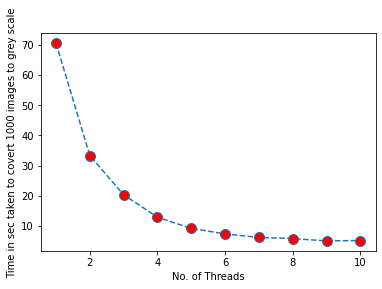

In [10]:
threads = list(range(1,len(times)+1))
plt.plot(threads,times, linestyle='dashed',marker = 'o',markerfacecolor='red', markersize=10)
plt.xlabel('No. of Threads')
plt.ylabel('Time in sec taken to covert 1000 images to grey scale')
plt.show()

In [11]:
times

[70.5021,
 33.2926,
 20.3348,
 12.9185,
 9.1974,
 7.3938,
 6.2204,
 5.8566,
 5.076,
 5.1942]

In [3]:
def task1(p,directory,x,y):
    for name in range(x,y+1):
        path = p
        path = os.path.join(path,str(name)+'.jpg')
        # print('path = ',path)
        img = cv2.imread(path)
        grey_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        grey_image_path = os.path.join(directory,str(name))+'.jpg'
        cv2.imwrite(grey_image_path,grey_image)
        # print('out = ',grey_image_path)

In [91]:
def Multithreading1(totalFiles,number_of_threads):
    
    startTime = time.time()
    activeThreads = threading.active_count()
    # print('Before Multi threading = ',activeThreads)

    
    print("Program Started....")
    pic = 1
    path = 'IMG/'
    files = os.listdir(path)
    lim = len(files)-1
    # print(files)
    # print(lim)
    os.makedirs(str(number_of_threads)+'th')
    directory = str(number_of_threads)+'th'
    # for i in files:
    x = y = 0
    while pic < totalFiles and pic < lim:
        x = pic
        y = pic+9
        pic = y+1
        # print(x,"  ",y)
        filep = 'IMG'
        if(pic == totalFiles):
            break
        
        t = threading.Thread(target=task1 , args=(filep,directory,x,y))
        t.start()
   
        if(y % 100 == 0):
            print ("Creating file %s"%(y))
            print('current Threads = ',threading.active_count())
      
        while True:
            if threading.active_count() - activeThreads + 1 <= number_of_threads:
                break


    while True:
        if threading.active_count() == activeThreads:
            break
        else:
            print ("    Thread still running (left %d)..."%(threading.active_count() - activeThreads))
            time.sleep(1)
  
    print(" All Thread ends")

    print("Program Finished")
    print("Total Time %f sec" % (round( time.time() - startTime,4)))
    return round( time.time() - startTime,4)

In [92]:
threads = 25
times = []
for i in range(1,threads+1):
    print('Threads created = ',i)
    print('Before Multi threading = ',threading.active_count())
    times.append(Multithreading1(1000,i))

Threads created =  1
Before Multi threading =  7
Program Started....
Creating file 100
current Threads =  8
Creating file 200
current Threads =  8
Creating file 300
current Threads =  8
Creating file 400
current Threads =  8
Creating file 500
current Threads =  8
Creating file 600
current Threads =  8
Creating file 700
current Threads =  8
Creating file 800
current Threads =  8
Creating file 900
current Threads =  8
Creating file 1000
current Threads =  8
 All Thread ends
Program Finished
Total Time 78.092800 sec
Threads created =  2
Before Multi threading =  7
Program Started....
Creating file 100
current Threads =  9
Creating file 200
current Threads =  9
Creating file 300
current Threads =  9
Creating file 400
current Threads =  9
Creating file 500
current Threads =  9
Creating file 600
current Threads =  9
Creating file 700
current Threads =  9
Creating file 800
current Threads =  9
Creating file 900
current Threads =  9
Creating file 1000
current Threads =  9
    Thread still runn

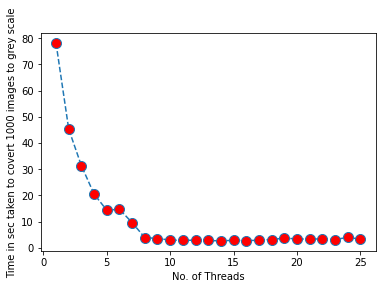

In [93]:
threads = list(range(1,len(times)+1))
plt.plot(threads,times, linestyle='dashed',marker = 'o',markerfacecolor='red', markersize=10)
plt.xlabel('No. of Threads')
plt.ylabel('Time in sec taken to covert 1000 images to grey scale')
plt.show()

In [94]:
times

[78.0928,
 45.2765,
 31.3298,
 20.4909,
 14.3504,
 14.6962,
 9.6029,
 3.885,
 3.5425,
 2.943,
 2.8033,
 2.9294,
 2.787,
 2.6212,
 2.8671,
 2.6972,
 2.9114,
 3.1427,
 3.7089,
 3.3672,
 3.2981,
 3.4027,
 3.1234,
 4.0079,
 3.2768]

In [43]:
def Multithreading2(totalFiles,folder_name,path):
    
    startTime = time.time()
    activeThreads = threading.active_count()
    print('Before Multi threading = ',activeThreads)

    
    print("Program Started....")
    pic = 1
    files = os.listdir(path)
    lim = len(files)-1
    os.makedirs(str(folder_name))
    directory = str(folder_name)
    x = y = 0
    while pic < totalFiles and pic < lim:
        x = pic
        y = pic+9
        pic = y+1
        if(pic == totalFiles):
            break
        t1 = threading.Thread(target=task1 , args=(path,directory,x,y))
        x = pic
        y = pic+9
        pic = y+1
        t2 = threading.Thread(target=task1 , args=(path,directory,x,y))
        if(pic == totalFiles):
            break
        # x = pic
        # y = pic+9
        # pic = y+1
        # t3 = threading.Thread(target=task1 , args=(path,directory,x,y))
        # if(pic == totalFiles):
        #     break
        # x = pic
        # y = pic+9
        # pic = y+1
        # t4 = threading.Thread(target=task1 , args=(path,directory,x,y))
        # if(pic == totalFiles):
        #     break
        t1.start()
        t2.start()
        # t3.start()
        # t4.start()
         
        if(y % 100 == 0):
            print ("Creating file %s"%(y))
            print('current Threads = ',threading.active_count())
      
        t1.join()
        t2.join()
        # t3.join()
        # t4.join()

    print("Program Finished")
    print("Total Time %f sec" % (round( time.time() - startTime,4)))
    return round( time.time() - startTime,4)

In [44]:
Multithreading2(1000,2,'IMG/')

Before Multi threading =  6
Program Started....
Creating file 100
current Threads =  8
Creating file 200
current Threads =  8
Creating file 300
current Threads =  8
Creating file 400
current Threads =  8
Creating file 500
current Threads =  8
Creating file 600
current Threads =  8
Creating file 700
current Threads =  8
Creating file 800
current Threads =  8
Creating file 900
current Threads =  8
Creating file 1000
current Threads =  8
Program Finished
Total Time 4.344500 sec


4.3445

In [49]:
def Multithreading(totalFiles,number_of_threads):
    
    startTime = time.time()
    activeThreads = threading.active_count()
    print('Before Multi threading = ',activeThreads)
    
    print("Program Started....")
    pic = 1
    path = 'IMG/'
    files = os.listdir(path)
    os.makedirs(str(number_of_threads)+'th')
    directory = str(number_of_threads)+'th'
    while pic < totalFiles + 1:
        cmd = str(pic) + '.jpg'
        # filep = os.path.join('IMG',cmd)
        t1 = threading.Thread(target=task , args=(os.path.join('IMG',cmd),directory,cmd))
        pic+=1
        cmd = str(pic) + '.jpg'
        # filep = os.path.join('IMG',cmd)
        t2 = threading.Thread(target=task , args=(os.path.join('IMG',cmd),directory,cmd))
        t1.start()
        t2.start() 
        if(pic % 100 == 0):
            print ("Creating file %s"%(pic))
            print('current Threads = ',threading.active_count())
        pic+=1
        t1.join()
        t2.join()

    print(" All Thread ends")

    print("Program Finished")
    print("Total Time %f sec" % (round( time.time() - startTime,4)))
    return round( time.time() - startTime,4)

In [50]:
Multithreading(1000,4)

Before Multi threading =  6
Program Started....
Creating file 100
current Threads =  8
Creating file 200
current Threads =  8
Creating file 300
current Threads =  8
Creating file 400
current Threads =  8
Creating file 500
current Threads =  8
Creating file 600
current Threads =  8
Creating file 700
current Threads =  8
Creating file 800
current Threads =  8
Creating file 900
current Threads =  8
Creating file 1000
current Threads =  8
 All Thread ends
Program Finished
Total Time 6.012700 sec


6.0127